## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Simple Linear Regression

**นำเข้าข้อมูลไฟล์ bmi_and_life_expectancy**

In [ ]:
data = pd.read_csv('/content/drive/bmi_and_life_expectancy.csv')

**ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น**

**ใช้ pairplot เพื่อดูความสัมพันธ์ทุกคู่ตัวแปรใน data set** 

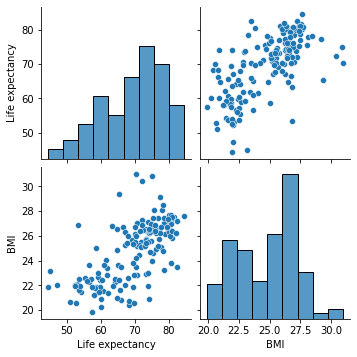

In [ ]:
sns.pairplot(data)

**กำหนดตัวแปรต้น (X) : (BMI) และตัวแปรตาม (y) : (Life expectancy)**

<!-- **Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101** -->

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=0`**

**สร้าง instance ของ class LinearRegression และทำการ fit model โดยใช้ fit()**

**ตรวจสอบ coefficients ของโมเดล**

array([[2.90926417]])

**Predicting Test Data ใช้โมเดลที่เราได้มาพยากรณ์ผลลัพธ์ test data โดยใช้ predict()**

**วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred**

Text(0, 0.5, 'Y Predicted')

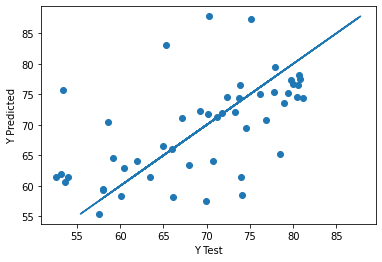

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

**ประเมินความถูกต้องของโมเดล ด้วยการคำนวณค่า MAE, MSE, RMSE**

In [ ]:
# Code here


print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 5.636183193671505
Mean Square Error: 58.681157439964096
Root Mean Square Error : 7.660362748588613


**จงเขียน สมการ regression ในรูปแบบ `y = w0 + w1x`**

**ทดลอง predict ด้วยค่าใดก็ได้เพื่อดูผลลัพธ์ค่า `Life expectancy`**

# Multiple Linear Regression

ตลาดอสังหาริมทรัพย์ในซิดนีย์และเมลเบิร์นนําเสนอโอกาสที่น่าสนใจสําหรับนักวิเคราะห์ข้อมูลในการวิเคราะห์และคาดการณ์ว่าราคาอสังหาริมทรัพย์จะเป็นไปอย่างไร การคาดการณ์ราคาอสังหาริมทรัพย์กําลังมีความสําคัญและเป็นประโยชน์มากขึ้นเพราะราคาอสังหาริมทรัพย์เป็นตัวบ่งชี้ที่ดีของทั้งสภาพตลาดโดยรวมและสุขภาพทางเศรษฐกิจของประเทศ

## Data Exploration
Data มีทั้งหมด 18 คอลัมน์ดังนี้

* date
* price (target)
* bedrooms
* bathrooms
* sqft_living
* sqft_lot
* floors : จำนวนชั้น
* waterfront
* view
* condition
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* street
* city
* statezip
* country

**Import Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/My IT KMITL Works/Lecture materials/Python for DS and ML/Shared folder/WEEK 3 - Intro to ML/Exercise/house_pricing.csv')

**ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น**

**ตรวจสอบ ค่าว่าง ว่ามีอยู่ในข้อมูลหรือไม่**

**ใช้ .shape เพื่อดูขนาดของข้อมูล**

**ตรวจสอบ แถวที่มีค่า = 0 ว่ามีอยู่ในฟีเจอร์ไหนบ้าง**

**จากการตรวจสอบ แถวที่มีค่า = 0 ถามว่ามีบ้านกี่หลังในตัวอย่างที่ไม่มีราคา**

**DROP row ที่ราคา (price) = 0**

**DROP ฟีเจอร์ที่ไม่ได้ใช้ (date, street, city, statezip, country) เนื่องจากมี data type เป็น Datetime / String**

In [ ]:
#ตรวจสอบขนาดของข้อมูลหลังจาก drop row และ column
data.shape

(4551, 13)

## **Removing Outliers**

An outlier is a case that differs substantially from the main trend of the data.

<img src="https://drive.google.com/uc?id=1KzGPYgbqEgwhO0M6SC4qbq5DaPzHXogG" width="400px">

### price - removing outliers

เมื่อทำการวาด boxplot ของข้อมูล price จะพบว่ามีข้อมูลที่เป็น Outlier จำนวนมาก 

(มีค่ามากกว่า Quartile ที่ 3 เกินกว่า 1.5 เท่าของ Inter-quartile range)

*Note: Inter-quartile range = Quartile ที่ 3 - Quartile ที่ 1*

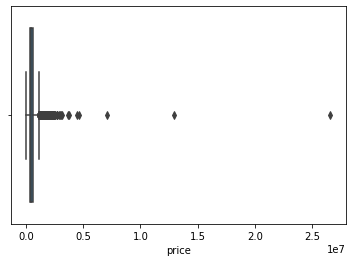

In [ ]:
sns.boxplot(x=data['price'])

In [ ]:
Q1_price = data.price.quantile(0.25)
Q3_price = data.price.quantile(0.75)
IQR_price =Q3_price- Q1_price

In [ ]:
lower_limit_price= Q1_price - 1.5*IQR_price
upper_limit_price= Q3_price + 1.5*IQR_price

**DROP แถวข้อมูลที่มีราคา (price) เกินกว่า upper_limit_price และ น้อยกว่า lower_limit_price**

In [ ]:
data_clean = data[(data.price>lower_limit_price)&(data.price<upper_limit_price)]

### sqft_living - removing outliers

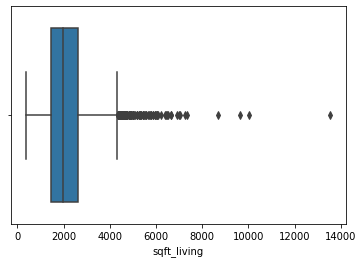

In [ ]:
sns.boxplot(x=data['sqft_living'])

In [ ]:
Q1_sqft_living = data.sqft_living.quantile(0.25)
Q3_sqft_living = data.sqft_living.quantile(0.75)
IQR_sqft_living =Q3_sqft_living- Q1_sqft_living
lower_limit_sqft_living= Q1_sqft_living - 1.5*IQR_sqft_living
upper_limit_sqft_living= Q3_sqft_living + 1.5*IQR_sqft_living

**แสดงแถวข้อมูลที่ sqft_living อาจจะเป็น outlier**

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0
122,2280000.0,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0
143,890000.0,4.0,4.25,4420,5750,2.0,0,0,3,3410,1010,2006,0
148,890000.0,5.0,3.50,4490,6000,2.0,0,0,3,3200,1290,2006,0
217,1870000.0,5.0,4.00,4510,15175,2.0,0,0,3,4510,0,1969,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,1240000.0,5.0,3.50,5430,10327,2.0,0,2,3,4010,1420,2007,0
4283,1550000.0,5.0,4.25,6070,171626,2.0,0,0,3,6070,0,1999,0
4398,195000.0,5.0,3.75,5340,10655,2.5,0,3,4,3740,1600,1912,1989
4400,692000.0,4.0,3.25,5010,34460,2.0,0,0,3,5010,0,1988,2000


**DROP แถวข้อมูลที่ sqft_living อาจจะเป็น outlier**

### sqft_lot - removing outliers

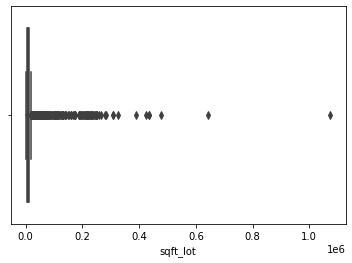

In [ ]:
sns.boxplot(x=data['sqft_lot'])

**คำนวณ lower และ upper limits สำหรับ sqft_lot**

**DROP แถวข้อมูลที่ sqft_living อาจจะเป็น outlier**

### sqft_above - removing outliers

In [ ]:
# Draw a boxplot

# Calculate lower and upper limits

# Drop rows with outlier data 

### sqft_basement - removing outliers

In [ ]:
# Draw a boxplot

# Calculate lower and upper limits

# Drop rows with outlier data 

In [ ]:
data_clean.shape

(3758, 13)

### **Pearson Correlation Matrix**

In [ ]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281


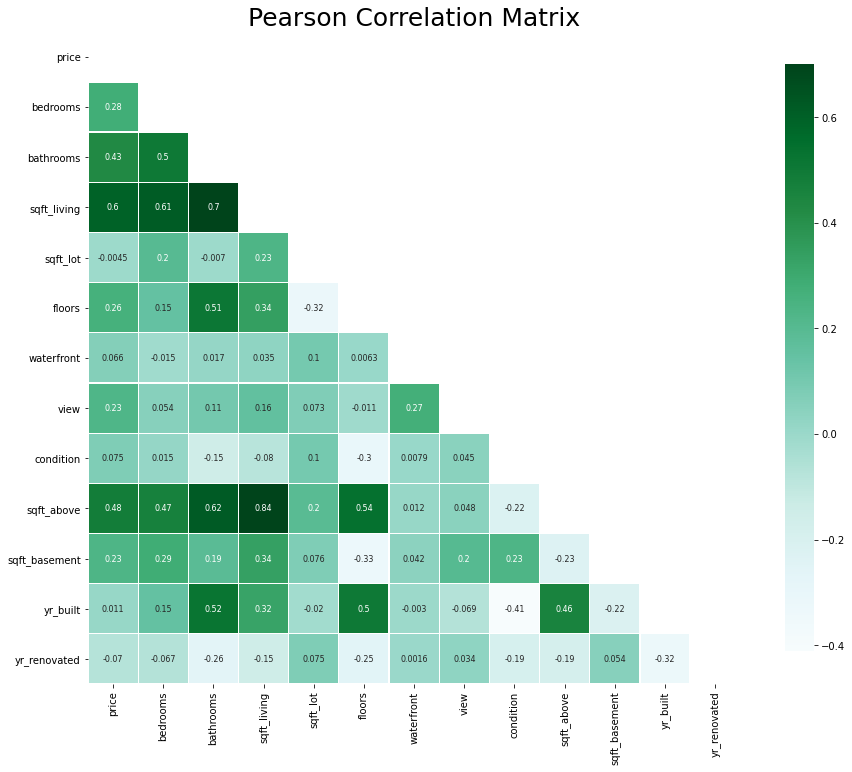

In [ ]:
# data.corr()
mask = np.zeros_like(data_clean.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data_clean.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

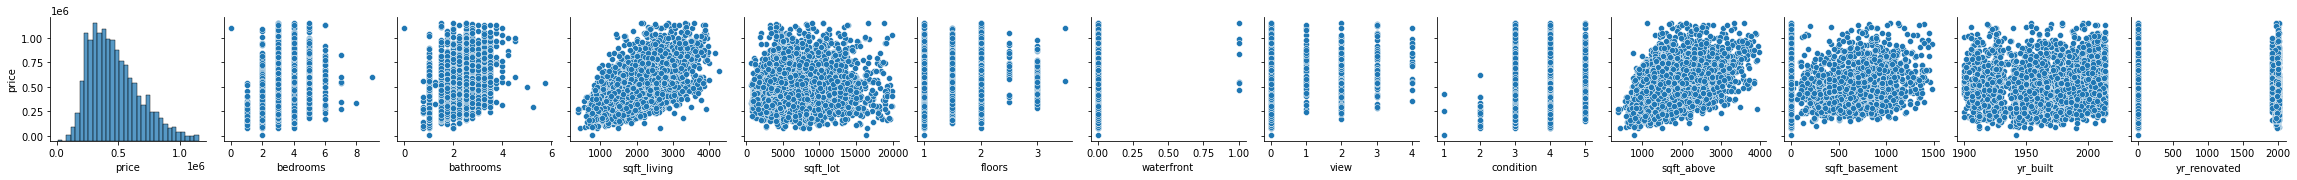

In [ ]:
sns.pairplot(data=data_clean, y_vars=['price'])

#### **วิเคราะห์ข้อมูลเบื้องต้น**
เมื่อดูจาก Pearson Correlation Matrix สามารถบอกได้ว่าคุณสมบัติในบ้านสัมพันธ์กับราคาบ้านอย่างไร จะเห็นได้ว่าคุณสมบัติที่มีความสัมพันธ์มากที่สุดคือ 
- `sqft_living` ด้วยค่าสัมประสิทธิ์ **0.6** ซึ่งสมเหตุสมผล เพราะยิ่งพื้นที่ใช้สอยเยอะราคาก็สูงขึ้น
- คุณลักษณะที่สองที่มีความสัมพันธ์มากที่สุดคือ `sqft_above` ด้วย **0.48** 
 
อย่างไรก็ตามเนื่องด้วยคุณสมบัติทั้งสองตัวนี้มีความสัมพันธ์กันสูงมาก ด้วยค่าสัมประสิทธิ์ 0.84 อย่างไรก็ตามจึงไม่สามารถใช้ทั้ง `sqft_living` `sqft_above` ได้ - ปัญหา **Multicollinearity**

ดังนั้นแนวทางปฏิบัติที่ดีที่สุดคือการเลือกคุณสมบัติตัวใดตัวหนึ่ง ในกรณีนี้จะเลือก `sqft_living`

## Model Fitting

**กำหนดตัวแปรต้น (X) และตัวแปรตาม (y)**

In [ ]:
X = data_clean.drop(['price','sqft_above'], axis=1)

In [ ]:
y = data_clean['price']

<!-- **Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101** -->

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=101`**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**ตรวจสอบ coefficients ของโมเดล**

In [ ]:
model.coef_

array([-3.79513647e+04,  3.43290282e+04,  2.03961372e+02, -6.67703516e+00,
        4.13476532e+04,  6.24448448e+04,  3.60614546e+04,  3.17152843e+04,
       -8.26498705e+00, -1.81893321e+03,  5.80779033e+00])

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
bedrooms,-37951.364728
bathrooms,34329.028243
sqft_living,203.961372
sqft_lot,-6.677035
floors,41347.653159
waterfront,62444.844796
view,36061.454585
condition,31715.284271
sqft_basement,-8.264987
yr_built,-1818.933207


## Making Predictions
**Predicting Test Data ใช้โมเดลที่เราได้มาพยากรณ์ (predict) ผลลัพธ์**

In [ ]:
y_pred = model.predict(X_test)

**วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred**

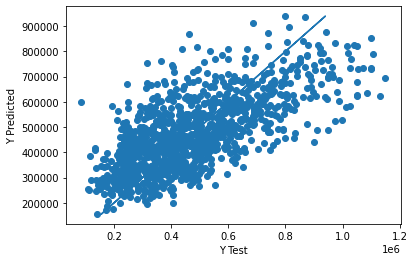

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

**ประเมินความถูกต้องของโมเดล ด้วยการคำนวณค่า MSE, RMSE, R2, MAPE**

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absulute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')
print(f"R2_score = {metrics.r2_score(y_test, y_pred)}")

Mean Absulute Error: 118010.51304334936
Mean Square Error: 22175092616.595024
Root Mean Square Error : 148913.0370941209
R2_score = 0.47424037944666375


## Formatting Data (Optional)

เนื่องจากข้อมูลใน feature `yr_built` และ `yr_renovated` เป็นปี คศ. จึงควรแก้ไขข้อมูลเพื่อให้เหมาะสมต่อการทำไปสร้าง model
- `yr_built` เปลี่ยนจากปี คศ. เป็นจำนวนปีนับจากปีปัจจุบัน
- `yr_renovate` ถ้าข้อมูลเป็น 0 (ไม่เคยถูก renovate) ให้แก้ไขค่ามาเป็นปีเดียวกับ `yr_built` จากนั้น เปลี่ยนจากปี คศ. เป็นจำนวนปีนับจากปีปัจจุบัน